In [1]:
# utilisation du jeu de données directement accessible sous seaborn
# intègre les données d'un restaurant
# une ligne = une personne qui a mangé dans le restaurant
# col1 = addition payée par personne
# col2 = porboire
# col3 = sexe
# col4 = fumeur ou non
# col5 = jour où il est venu au restaurant
# col6 = à quelle moment il est venu déjeûner ou diner
# col7 = size non à utiliser

In [16]:
# chargement des librairies
# importer la librairie seaborn
import seaborn as sns
# importer la librairie pyplpot
import matplotlib.pyplot as plt
# importer pandas
import pandas
# importer numpy
import numpy as np

In [3]:
# chargement du jeu de données
tips=sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
# 1. Tracer un barplot avec la fonction sns.barplot représentant la variable total_bill
# en séparant ces données par sexe

# aide sur la graphique
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000002403C242C10>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia

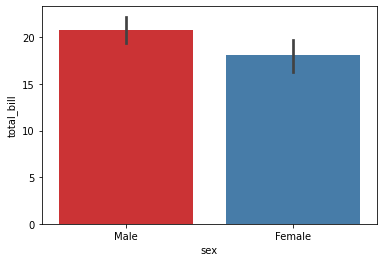

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips, palette='Set1')
plt.draw()

In [21]:
# 2. Utiliser la fonction sns.distplot sur la variable total_bill pour 
# étudier sa distribution

# aide sns.distplot
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.
  

In [26]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

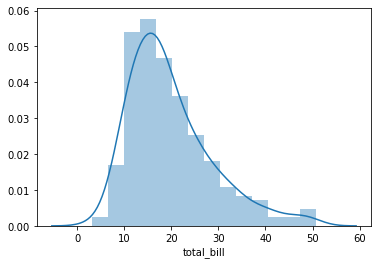

In [30]:
# attend une série : ok car tips['total_bill'] = série
# histogramme avec une courbe ( kde estimation par noyau estime la densité
# de probabilité d'une variable aléatoire)
# les addition sont entre 5 et 35%
sns.distplot(tips['total_bill'])
plt.draw()

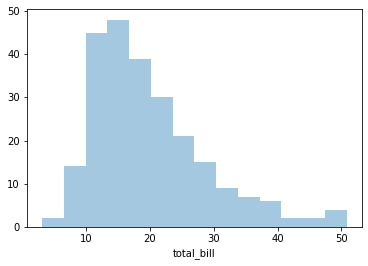

In [32]:
# sans la courbe
sns.distplot(tips['total_bill'], kde=False)
plt.draw()

In [35]:
# 3. utiliser la fonction jointplot de seaborn pour tracer la variable total_bill
# en fonction de la variable tip(Y)
# addition total en fonction du pourboire

help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

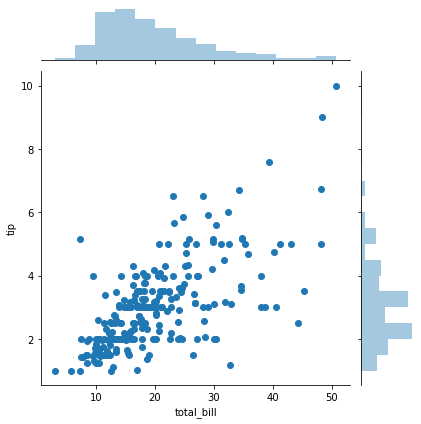

In [36]:
# mettre sur une même grphique un graphique bi-varié et uni-varié
# bi varié : relation entre variable total_bill et tip
# uni varié : histogramme de chaque variable
# majorité de points entre 1 et 5 $
# régression linéaire? plus l'addition augmente plus le pourboire augmente
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.draw()

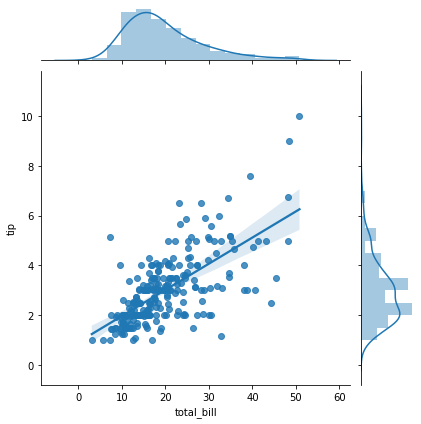

In [37]:
# tracerune droite linéaire?
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
plt.draw()

In [38]:
# 4. utiliser pairplot  de seaborn sur l'ensemble du dataframe tips 
# pour étudier les relations entre l'ensemble des variables

help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

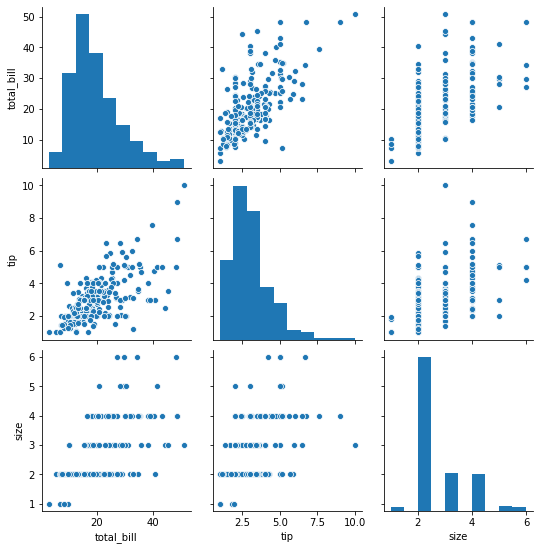

In [39]:
sns.pairplot(tips)
plt.draw()

In [40]:
# 5 Tracer le boxplot de la variable total_bill en créant un boxplot
# par jour (variable day) et en utilisant la variable sex dans l'option hue

help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` paramet

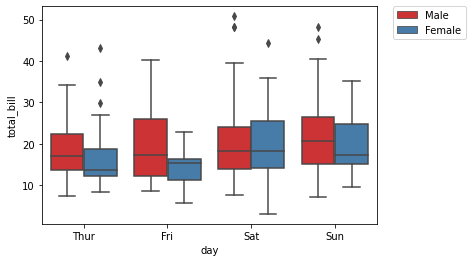

In [45]:
# plus de pourboire le samedi/dimanche
# femme dépensent plus le dimanche et jeudi
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.draw()